In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

[3.6353517206867445]
25.20082642053821
173


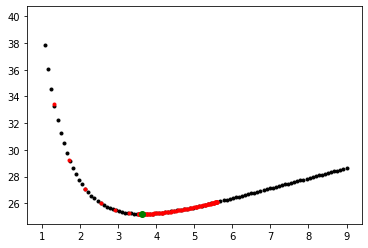

In [3]:
from numpy.core.fromnumeric import resize
X=[1,2,3,3,7,3,5,4,6,2,4]
Sx=sum(X)
N=len(X)
func = lambda th: N*np.log(th[0])+ Sx/th[0]

#Representacion 

_x =np.linspace(1,9, 100)
_y=np.zeros(100)
for ix, x in enumerate(_x):
  _y[ix]=func([x])

plt.plot(_x,_y, ".", c = "black")


#Algoritmo AMSGrad
Theta=[1]
Thetaold = [0]
lr=0.1
b1= 0.9
b2=0.999
k=1
E=10**(-8)
plt.plot(Theta[0],func(Theta), "o", c = "white")
grad=np.zeros(1)
m=[0]
v=[0]
V=np.zeros(1)
contador= 0
diferencia=1

for _ in range(10000):

  if diferencia < 10**-5:
    break
  else:
    grad[0] = N/Theta[0] - Sx/Theta[0]**2
  #print(grad)
    
    for it, th in enumerate(Theta):
        m[it]= b1*m[it] + (1-b1)* grad[it]
        v[it]= b2*v[it] + (1-b2)* grad[it]**2
  
    b1k= b1**(k)
    b2k= b2**(k)
    k=k+1

    for it, th in enumerate(Theta):

      if V[0] < v[0]:
        V[it]= v[it]
      else:
        V[it]=V[it]
    #print(V)

    for it, th in enumerate(Theta):  
      Thetaold[it]=Theta[it]
      Theta[it] = Theta[it] - lr * m[it]/ np.sqrt(V[it] + E)
    plt.plot(Theta[0],func(Theta), ".", c = "red")

    diferencia=np.sqrt((Thetaold[0]-Theta[0])**2)
    #print(diferencia)
    contador=contador+1

print(Theta)
print(func(Theta))
print(contador)
plt.plot(Theta[0],func(Theta), "o", c = "green")

plt.show()